In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [49]:
# Loading data from the web
# Data was downloaded from https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data?resource=download
bill_url = "https://raw.githubusercontent.com/DSCI-310-2025/dsci-310-group-python2/refs/heads/main/data/BankNote_Authentication.csv"
bill_data = pd.read_csv(bill_url)

In [50]:
# See if there are missing values
missing_values = bill_data.isna().sum().sum()
print(missing_values)

0


In [51]:
# Create count table
count_table = bill_data.groupby('class').size().reset_index(name='Count')
count_table['Percentage'] = 100 * count_table['Count'] / len(bill_data)

count_table

,class,Count,Percentage
0,0,762,55.539359
1,1,610,44.460641


In [52]:
# Split data into training and testing sets
bill_train, bill_test = train_test_split(bill_data, test_size=0.25, stratify=bill_data['class'], random_state=1)

print(bill_train.head(5))

      variance  skewness  curtosis  entropy  class
892    0.21431  -0.69529   0.87711  0.29653      1
465   -2.69890  12.19840   0.67661 -8.54820      0
57     5.80700   5.00970  -2.23840  0.43878      0
1166  -2.19790  -2.12520   1.71510  0.45171      1
223    4.64640  10.53260  -4.58520 -4.20600      0


In [53]:
# Create class proportions table
class_proportions_table = bill_train.groupby('class').size().reset_index(name='Count')
class_proportions_table['Percentage'] = 100 * class_proportions_table['Count'] / len(bill_train)

print(class_proportions_table)

# We notice that our "class" proportions were preserved when we split the data

   class  Count  Percentage
0      0    572   55.587949
1      1    457   44.412051


In [54]:
# Compute mean for each factor
means_per_column = bill_train.iloc[:, :-1].mean().reset_index()
means_per_column.columns = ['Factor', 'Mean_Value']

print(means_per_column)

     Factor  Mean_Value
0  variance    0.398695
1  skewness    1.837843
2  curtosis    1.462280
3   entropy   -1.192189


In [55]:
# Compute max for each factor
max_per_column = bill_train.iloc[:, :-1].max().reset_index()
max_per_column.columns = ['Factor', 'Maximum_Value']

print(max_per_column)

     Factor  Maximum_Value
0  variance         6.8248
1  skewness        12.6247
2  curtosis        17.6772
3   entropy         2.1625


In [56]:
# Compute min for each factor
min_per_column = bill_train.iloc[:, :-1].min().reset_index()
min_per_column.columns = ['Factor', 'Minimum_Value']

print(min_per_column)


     Factor  Minimum_Value
0  variance        -7.0421
1  skewness       -13.6779
2  curtosis        -5.2861
3   entropy        -8.5482


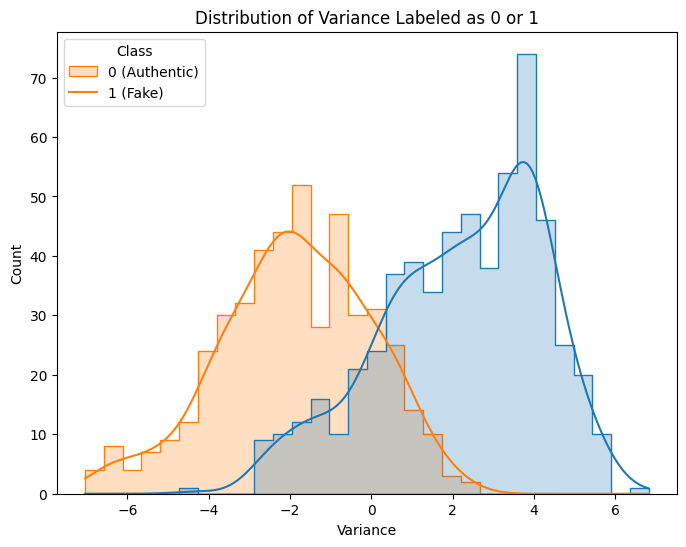

In [65]:
# Plot histogram of variance column distribution

plt.figure(figsize=(8, 6))
sns.histplot(data=bill_train, x='variance', hue='class', element='step', bins=30, kde=True)
plt.xlabel("Variance")
plt.ylabel("Count")
plt.title("Distribution of Variance Labeled as 0 or 1")
plt.legend(title="Class", labels=["0 (Authentic)", "1 (Fake)"])
plt.show()

### Figure 1. Distribution of Variance Grouped By Authentic or Fake

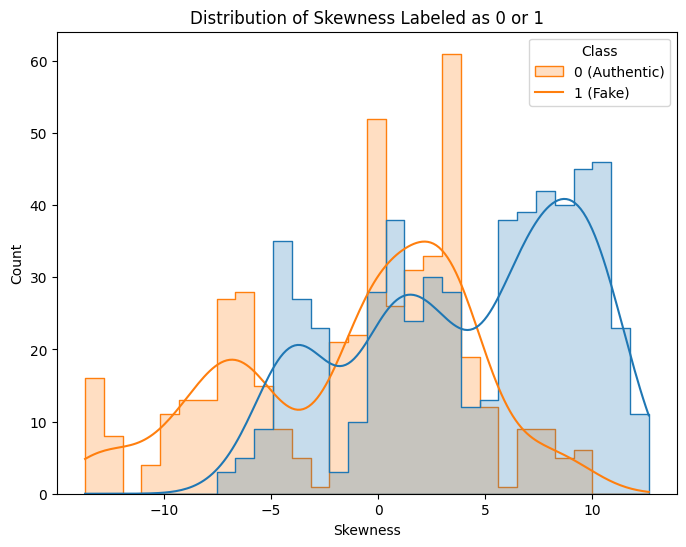

In [64]:
# Plot histogram of skewness column distribution

plt.figure(figsize=(8, 6))
sns.histplot(data=bill_train, x='skewness', hue='class', element='step', bins=30, kde=True)
plt.xlabel("Skewness")
plt.ylabel("Count")
plt.title("Distribution of Skewness Labeled as 0 or 1")
plt.legend(title="Class", labels=["0 (Authentic)", "1 (Fake)"])
plt.show()

### Figure 3. Distribution of Skewness Grouped By Authentic or Fake

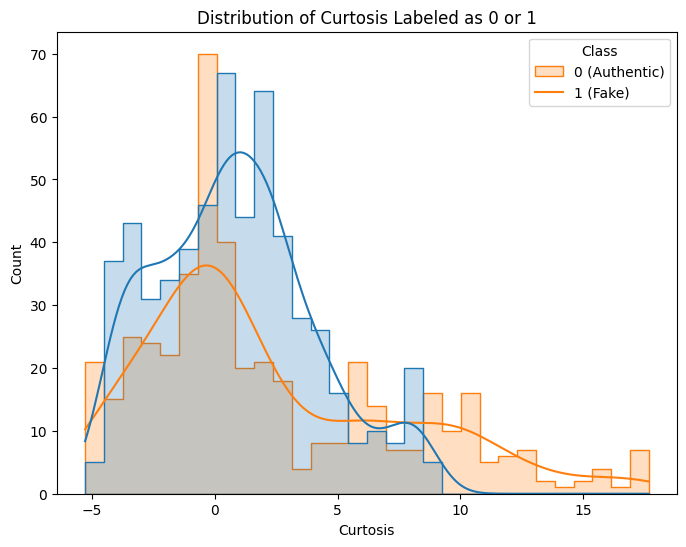

In [67]:
# Plot histogram of curtosis column distribution

plt.figure(figsize=(8, 6))
sns.histplot(data=bill_train, x='curtosis', hue='class', element='step', bins=30, kde=True)
plt.xlabel("Curtosis")
plt.ylabel("Count")
plt.title("Distribution of Curtosis Labeled as 0 or 1")
plt.legend(title="Class", labels=["0 (Authentic)", "1 (Fake)"])
plt.show()

### Figure 3. Distribution of Curtosis Grouped By Authentic or Fake

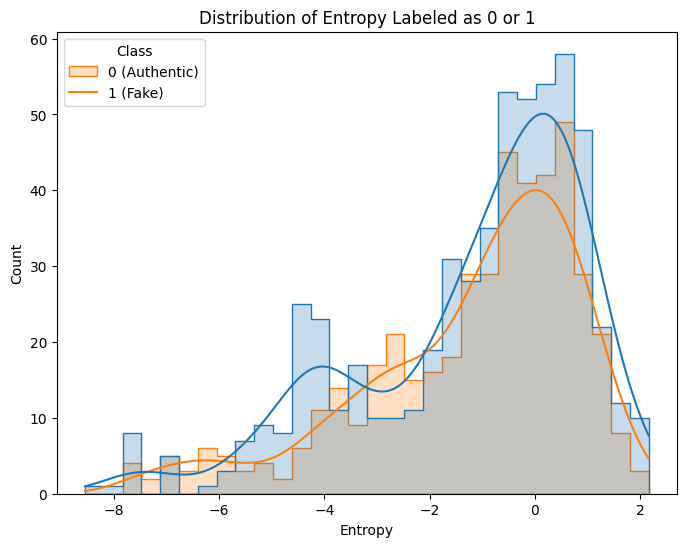

In [66]:
# Plot histogram of entropy column distribution

plt.figure(figsize=(8, 6))
sns.histplot(data=bill_train, x='entropy', hue='class', element='step', bins=30, kde=True)
plt.xlabel("Entropy")
plt.ylabel("Count")
plt.title("Distribution of Entropy Labeled as 0 or 1")
plt.legend(title="Class", labels=["0 (Authentic)", "1 (Fake)"])
plt.show()

### Figure 3. Distribution of Entropy Grouped By Authentic or Fake